# <span style="color: blue;">G</span><span style="color: red;">o</span><span style="color: yellow;">o</span><span style="color: blue;">g</span><span style="color: green;">l</span><span style="color: red;">e</span> Stock Analysis 2024

### <span style= "color:blue;"> The Data</span>  

**Imports, Read, and Data Info.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df= pd.read_csv('Google_Data_2024.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-01-02,139.600006,140.615005,137.740005,139.559998,139.559998,20071900
1,2024-01-03,138.600006,141.089996,138.429993,140.360001,140.360001,18974300
2,2024-01-04,139.850006,140.634995,138.009995,138.039993,138.039993,18253300
3,2024-01-05,138.352005,138.809998,136.850006,137.389999,137.389999,15433200
4,2024-01-08,138.000000,140.639999,137.880005,140.529999,140.529999,17645300


In [3]:
df.tail() 

,Date,Open,High,Low,Close,Adj Close,Volume
99,2024-05-23,178.779999,179.910004,174.539993,175.059998,175.059998,14928400
100,2024-05-24,176.520004,177.304001,175.199997,176.330002,176.330002,11400600
101,2024-05-28,175.740005,178.509995,175.679993,178.020004,178.020004,15655300
102,2024-05-29,176.809998,178.229996,176.259995,177.399994,177.399994,15005100
103,2024-05-30,176.589996,176.619995,174.060104,174.229996,174.229996,9274471


In [4]:
#May 30, 2024 is the last date in df data set. Need to get the remaining data for 2024
import yfinance as yf

google_stock = yf.download("GOOGL", start="2024-05-31", end="2024-12-31")
google_stock.reset_index(inplace=True)
google_stock = google_stock[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

print(google_stock.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price        Date        Open        High         Low       Close    Volume
Ticker                  GOOGL       GOOGL       GOOGL       GOOGL     GOOGL
0      2024-05-31  171.042245  172.236532  168.633762  171.679199  37638900
1      2024-06-03  171.719016  173.699553  170.345593  172.346024  27459100
2      2024-06-04  172.455506  173.022801  171.072120  172.963074  26879600
3      2024-06-05  174.366356  175.809453  173.102394  174.575363  22068500
4      2024-06-06  175.063016  176.307068  174.913736  175.889069  23251000


In [5]:
google_stock.tail()

Price,Date,Open,High,Low,Close,Volume
Ticker,,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
142,2024-12-23,192.398415,194.875573,189.931255,194.406113,25675000
143,2024-12-24,194.615856,195.884399,193.557078,195.884399,10403300
144,2024-12-26,194.925505,196.523671,194.156402,195.375000,12046600
145,2024-12-27,194.725737,195.095322,190.430680,192.538254,18891400
146,2024-12-30,189.581658,192.328495,188.902433,191.020004,14264700


In [6]:
print('CSV data info')
print(df.info())
print('yfinance data info')
print(google_stock.info())

CSV data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       104 non-null    object 
 1   Open       104 non-null    float64
 2   High       104 non-null    float64
 3   Low        104 non-null    float64
 4   Close      104 non-null    float64
 5   Adj Close  104 non-null    float64
 6   Volume     104 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 5.8+ KB
None
yfinance data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   (Date, )         147 non-null    datetime64[ns]
 1   (Open, GOOGL)    147 non-null    float64       
 2   (High, GOOGL)    147 non-null    float64       
 3   (Low, GOOGL)     147 non-null    float64       
 4   (Close, G

In [7]:
#drop Adj Close and have Date in datetime
df = df.drop(columns=['Adj Close'], axis = 1)
df['Date'] = pd.to_datetime(df['Date'])

#clean the yfinance data, combine the 2, and print the result
google_stock.columns = [col[0] for col in google_stock.columns]
df_complete = pd.concat([df, google_stock], ignore_index=True)
print(df_complete.head())

        Date        Open        High         Low       Close    Volume
0 2024-01-02  139.600006  140.615005  137.740005  139.559998  20071900
1 2024-01-03  138.600006  141.089996  138.429993  140.360001  18974300
2 2024-01-04  139.850006  140.634995  138.009995  138.039993  18253300
3 2024-01-05  138.352005  138.809998  136.850006  137.389999  15433200
4 2024-01-08  138.000000  140.639999  137.880005  140.529999  17645300


In [8]:
df_complete.tail()

,Date,Open,High,Low,Close,Volume
246,2024-12-23,192.398415,194.875573,189.931255,194.406113,25675000
247,2024-12-24,194.615856,195.884399,193.557078,195.884399,10403300
248,2024-12-26,194.925505,196.523671,194.156402,195.375000,12046600
249,2024-12-27,194.725737,195.095322,190.430680,192.538254,18891400
250,2024-12-30,189.581658,192.328495,188.902433,191.020004,14264700


In [9]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    251 non-null    datetime64[ns]
 1   Open    251 non-null    float64       
 2   High    251 non-null    float64       
 3   Low     251 non-null    float64       
 4   Close   251 non-null    float64       
 5   Volume  251 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.9 KB


In [10]:
df_complete.describe()

,Date,Open,High,Low,Close,Volume
count,251,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,2024-07-01 02:11:57.131474176,163.908958,165.628248,162.349824,164.005603,2.425448e+07
min,2024-01-02 00:00:00,132.740005,134.020004,131.550003,132.559998,9.274471e+06
25%,2024-04-02 12:00:00,152.515074,154.799996,151.489998,153.345001,1.797405e+07
50%,2024-07-02 00:00:00,164.382070,165.838164,163.025185,164.581619,2.110240e+07
75%,2024-09-30 12:00:00,174.667934,176.417089,173.271631,174.551003,2.680195e+07
max,2024-12-30 00:00:00,197.023087,201.188288,194.755694,196.433777,6.889080e+07
std,NaN,14.759582,14.982279,14.599678,14.791961,1.027971e+07


In [11]:
correlation_matrix = df_complete.corr()
print(correlation_matrix)

            Date      Open      High       Low     Close    Volume
Date    1.000000  0.677413  0.679029  0.668580  0.669677  0.219617
Open    0.677413  1.000000  0.995793  0.994600  0.989143  0.084074
High    0.679029  0.995793  1.000000  0.995085  0.994787  0.110113
Low     0.668580  0.994600  0.995085  1.000000  0.996362  0.044929
Close   0.669677  0.989143  0.994787  0.996362  1.000000  0.069280
Volume  0.219617  0.084074  0.110113  0.044929  0.069280  1.000000


# <span style="color: blue;">G</span><span style="color: red;">o</span><span style="color: yellow;">o</span><span style="color: blue;">g</span><span style="color: green;">l</span><span style="color: red;">e</span> 2024

In 2024, Google achieved significant strides in both hardware and software, with standout moments like the launch of Android 15 and the unveiling of Android XR, signaling its commitment to AI and extended reality. Google also solidified its position in the enterprise sector with the acquisition of Cameyo, enhancing its ChromeOS capabilities and supporting hybrid work environments. The Made by Google Event showcased the Pixel 9 series, Pixel Watch 3, and Pixel Buds Pro 2, all of which leveraged advanced AI features, marking Google’s intent to compete with industry leaders like Apple. However, the company faced challenges, particularly in the streaming market, as its Google TV Streamer struggled to differentiate itself in a crowded space despite hardware upgrades. Stock performance saw fluctuations, impacted by competitive pressures and ongoing regulatory scrutiny, with investors closely watching Google’s ability to sustain its innovation-driven growth. Shareholder trust remained relatively strong, bolstered by Google's strategic focus on AI and cloud-based services. Yet, there were concerns about the increasing complexity of its product ecosystem and whether it could maintain market dominance. As we look to 2025, Google’s focus will likely remain on expanding its AI capabilities, particularly through Gemini Nano, while navigating competitive threats in hardware and software markets. The company’s ability to leverage its AI strengths and integrate them across devices and services will be key to its continued growth and investor confidence.

**<span style= "color: green;">Exploratory Data Analysis (EDA)</span>**

**Year Review 2024**  
Visual Representation with Open and Close Stock Prices followed by Volume of Shares Traded.

In [12]:
start_date= '2024-01-01'
end_date= '2024-12-31'

df_yr24 = df_complete[(df_complete['Date'] >= start_date) & (df_complete['Date'] <= end_date)]
df_yr24.head()

,Date,Open,High,Low,Close,Volume
0,2024-01-02,139.600006,140.615005,137.740005,139.559998,20071900
1,2024-01-03,138.600006,141.089996,138.429993,140.360001,18974300
2,2024-01-04,139.850006,140.634995,138.009995,138.039993,18253300
3,2024-01-05,138.352005,138.809998,136.850006,137.389999,15433200
4,2024-01-08,138.000000,140.639999,137.880005,140.529999,17645300


In [13]:
df_yr24.tail()

,Date,Open,High,Low,Close,Volume
246,2024-12-23,192.398415,194.875573,189.931255,194.406113,25675000
247,2024-12-24,194.615856,195.884399,193.557078,195.884399,10403300
248,2024-12-26,194.925505,196.523671,194.156402,195.375000,12046600
249,2024-12-27,194.725737,195.095322,190.430680,192.538254,18891400
250,2024-12-30,189.581658,192.328495,188.902433,191.020004,14264700


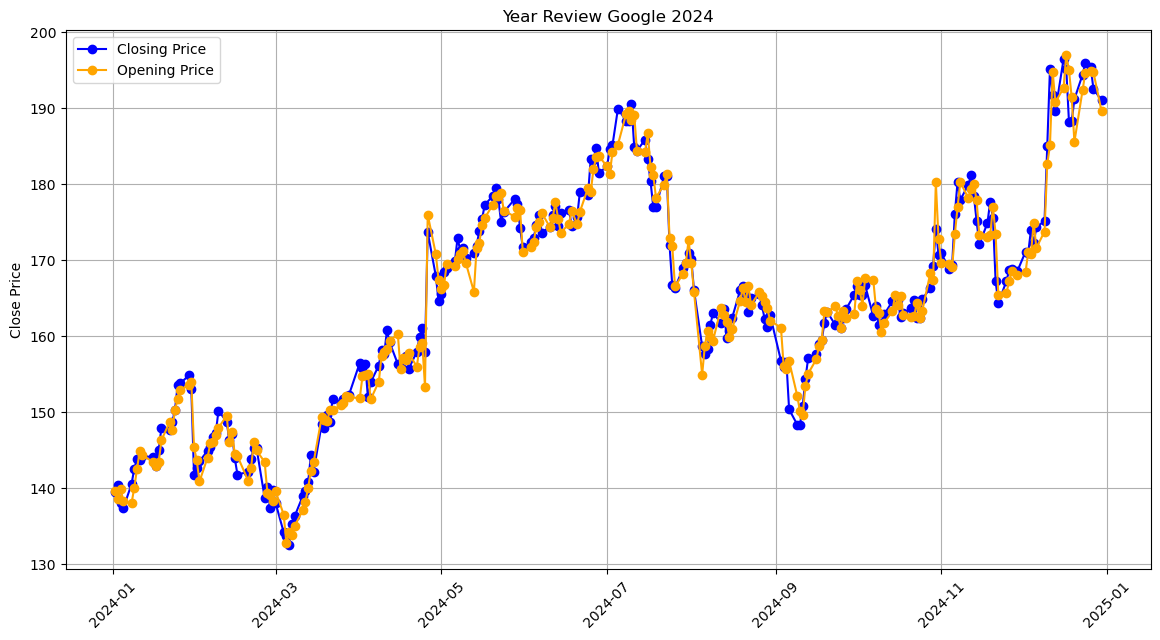

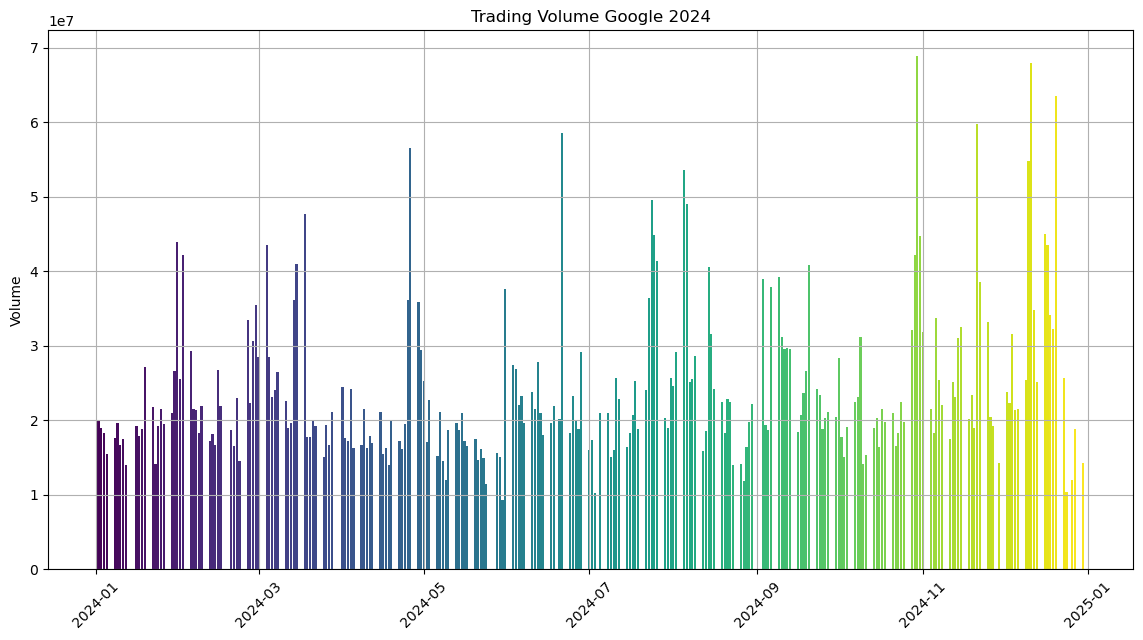

In [14]:
#Google 2024
plt.figure(figsize=(14, 7))
plt.plot(df_yr24['Date'], df_yr24['Close'], marker='o', linestyle='-',label= 'Closing Price', color='blue')
plt.plot(df_yr24['Date'], df_yr24['Open'], marker='o', linestyle='-', label='Opening Price', color='orange')
plt.title('Year Review Google 2024')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

palette = sns.color_palette("viridis", n_colors=len(df_yr24))
plt.figure(figsize=(14, 7))
plt.bar(df_yr24['Date'], df_yr24['Volume'], color=palette)
plt.title('Trading Volume Google 2024')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**<span style="color: blue;">G</span><span style="color: red;">o</span><span style="color: yellow;">o</span><span style="color: blue;">g</span><span style="color: green;">l</span><span style="color: red;">e</span> Individual Events and Markers**

**List of Individual Markers**  

1. **Android Auto Updates**: January 9, 2024  
2. **Google Announces Pixel 8a**: May 7, 2024  
3. **Google I/O Develpers Conference**: May 14-15, 2024  
4. **Google Acquires Cameyo**: June 5, 2024  
5. **Made by Google Event**: August 13, 2024  
6. **Release of Google TV Streamer**: September 24, 2024  
7. **Launch of Android 15 and Gemini Nano**: October 15, 2024   
8. **Android XR Announcement**: December 12, 2024

**Android Auto Updates**  
(January 9, 2024)  

At CES 2024, Google introduced significant updates to Android Auto, aimed at improving navigation, entertainment, and connectivity for drivers. Key enhancements include EV battery integration, allowing electric vehicles like the Ford Mustang Mach-E and F-150 Lightning to share real-time battery data with Google Maps for better trip planning and charging stops. Additionally, video streaming apps like PBS KIDS and Crunchyroll, along with the Chrome browser for select cars, expand entertainment options for passengers. The integration of Weather Channel and interface improvements further enhance the user experience. These updates showcase Google's commitment to enhancing in-car technology and supporting the growing use of electric vehicles.

In [15]:
start_date= '2024-01-03'
end_date= '2024-01-29'

df_auto = df_complete[(df_complete['Date'] >= start_date) & (df_complete['Date'] <= end_date)]
df_auto.head(10)

,Date,Open,High,Low,Close,Volume
1,2024-01-03,138.600006,141.089996,138.429993,140.360001,18974300
2,2024-01-04,139.850006,140.634995,138.009995,138.039993,18253300
3,2024-01-05,138.352005,138.809998,136.850006,137.389999,15433200
4,2024-01-08,138.000000,140.639999,137.880005,140.529999,17645300
5,2024-01-09,140.059998,142.800003,139.789993,142.559998,19579700
6,2024-01-10,142.520004,144.524994,142.460007,143.800003,16641900
7,2024-01-11,144.895004,146.660004,142.214996,143.669998,17471100
8,2024-01-12,144.339996,144.740005,143.360001,144.240005,13995200
9,2024-01-16,143.429993,145.839996,143.056000,144.080002,19198900
10,2024-01-17,142.910004,143.410004,140.509995,142.889999,17884500


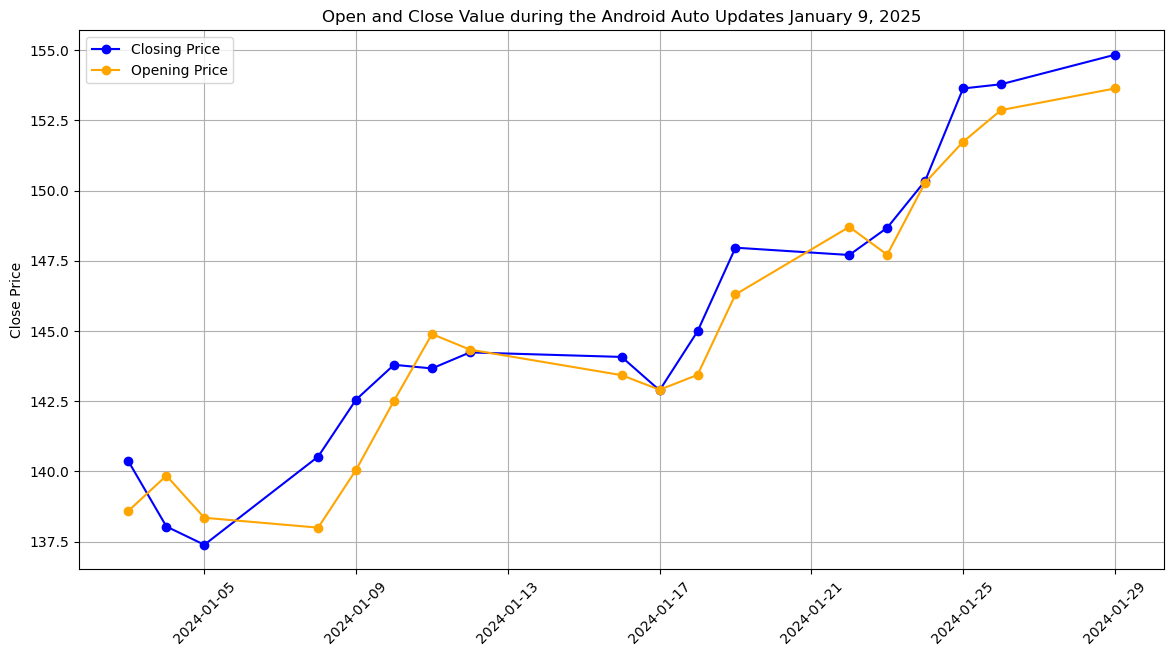

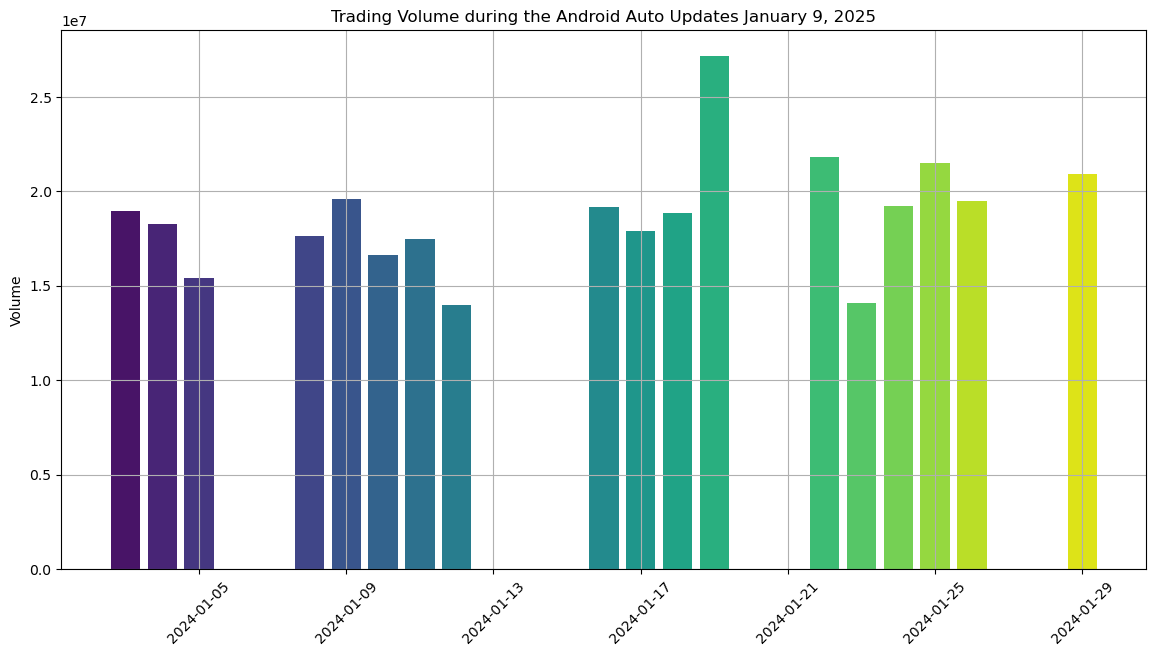

In [16]:
#Android Auto Updates
plt.figure(figsize=(14, 7))
plt.plot(df_auto['Date'], df_auto['Close'], marker='o', linestyle='-',label= 'Closing Price', color='blue')
plt.plot(df_auto['Date'], df_auto['Open'], marker='o', linestyle='-', label='Opening Price', color='orange')
plt.title('Open and Close Value during the Android Auto Updates January 9, 2025')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

palette = sns.color_palette("viridis", n_colors=len(df_auto))
plt.figure(figsize=(14, 7))
plt.bar(df_auto['Date'], df_auto['Volume'], color=palette)
plt.title('Trading Volume during the Android Auto Updates January 9, 2025')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Google Announces Pixel 8a**  
(May 7, 2024)

On May 7, 2024, Google introduced the Pixel 8a, a midrange smartphone priced at $499, offering premium features from the Pixel 8 series at an affordable price. It features a 6.1-inch OLED display, a Google Tensor G3 processor, and 8GB of RAM, with storage options of 128GB or 256GB. The camera system includes a 64MP main sensor and 13MP ultrawide sensor, along with advanced AI tools like Magic Editor and Photo Unblur. Powered by a 4,492mAh battery, it offers long-lasting usage and supports 5G, Wi-Fi 6E, and Bluetooth 5.3. Praised for its flagship-like features at an affordable price, the Pixel 8a strengthens Google's position in the competitive midrange smartphone market.

**Google I/O Conference**  
(May 14-15, 2024)  

The Google I/O Conference 2024, held on May 14-15, focused on AI advancements, updates to Android 15, and new hardware. Key announcements included the introduction of Gemini 1.5, a faster and lighter version of Google's AI model, and expanded capabilities in the Search Generative Experience (SGE). Google also unveiled Project Astra, a vision for next-gen AI assistants, and introduced the Trillium TPU, offering a 4.7x increase in compute performance. Updates to Android 15 emphasized improved customization and privacy controls, while hardware announcements featured the Pixel Fold 2 and enhanced Pixel Tablet capabilities. The conference reinforced Google's leadership in AI and its commitment to developer tools and ecosystem enhancements.


In [17]:
start_date= '2024-05-01'
end_date= '2024-06-05'

df_conf = df_complete[(df_complete['Date'] >= start_date) & (df_complete['Date'] <= end_date)]
df_conf.head(10)

,Date,Open,High,Low,Close,Volume
83,2024-05-01,166.179993,168.809998,164.899994,165.570007,25223200
84,2024-05-02,166.669998,168.529999,165.690002,168.460007,17041100
85,2024-05-03,169.539993,169.850006,164.979996,168.990005,22767100
86,2024-05-06,169.220001,169.899994,167.889999,169.830002,15147900
87,2024-05-07,170.119995,173.470001,170.000000,172.979996,21102400
88,2024-05-08,170.750000,171.908997,170.522003,171.160004,14569900
89,2024-05-09,171.149994,172.440002,169.929993,171.580002,11937700
90,2024-05-10,169.690002,171.339996,167.910004,170.289993,18740500
91,2024-05-13,165.847000,170.949997,165.759995,170.899994,19648600
92,2024-05-14,171.589996,172.779999,170.419998,171.929993,18729500


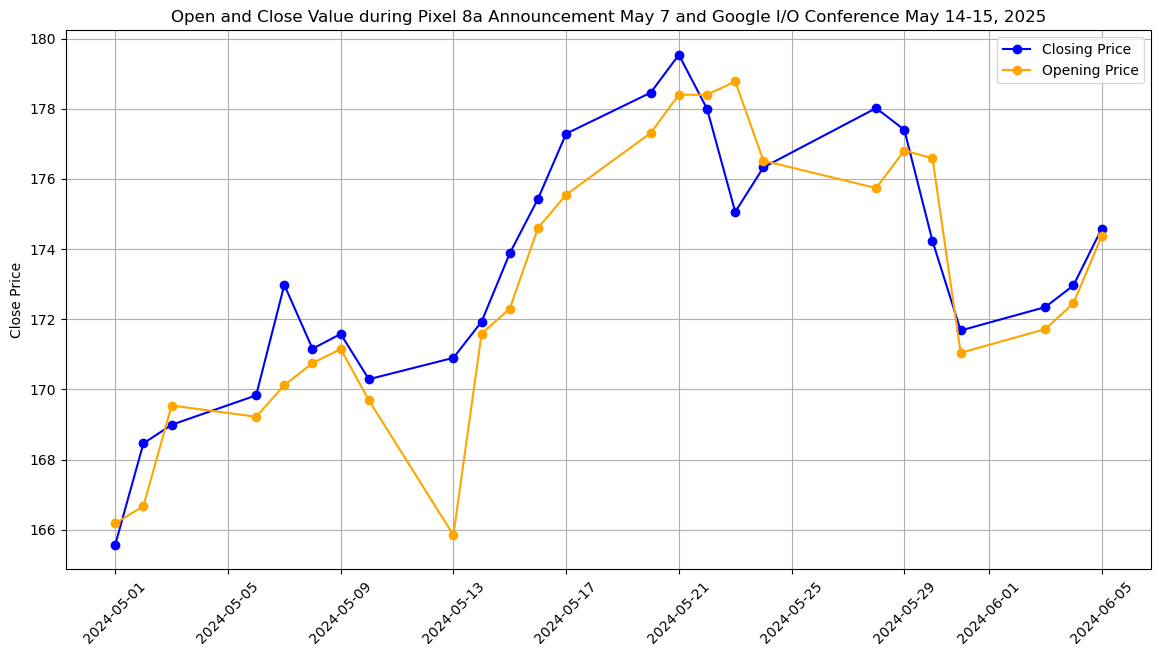

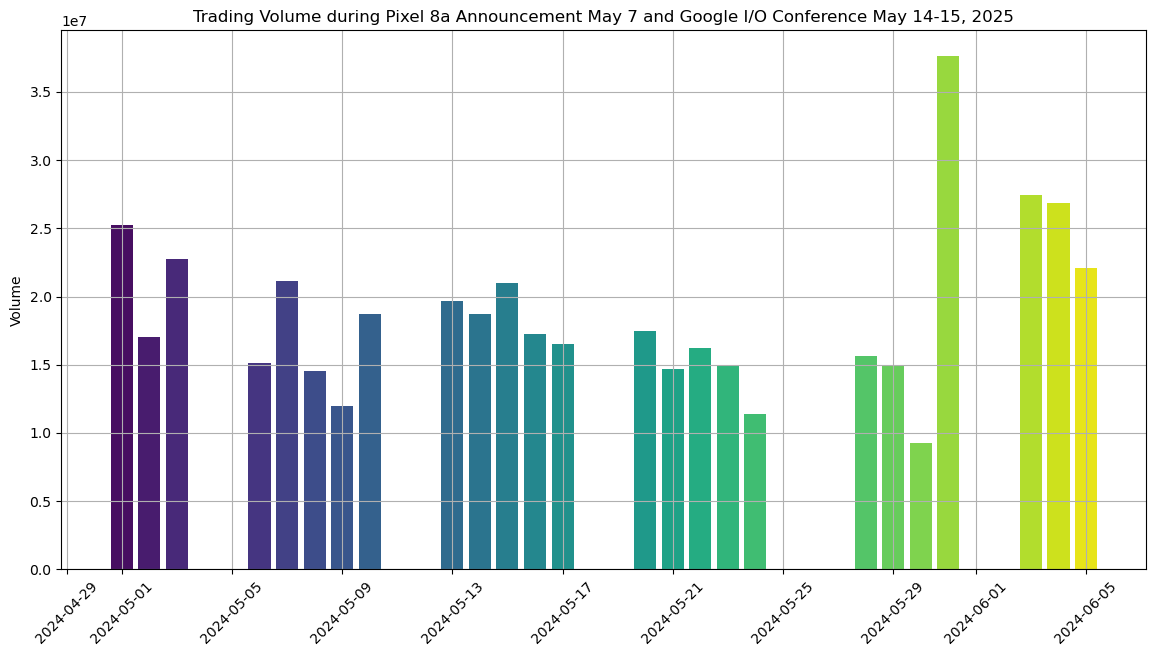

In [18]:
#Pixel 8a Announcement and Google I/O Conference
plt.figure(figsize=(14, 7))
plt.plot(df_conf['Date'], df_conf['Close'], marker='o', linestyle='-',label= 'Closing Price', color='blue')
plt.plot(df_conf['Date'], df_conf['Open'], marker='o', linestyle='-', label='Opening Price', color='orange')
plt.title('Open and Close Value during Pixel 8a Announcement May 7 and Google I/O Conference May 14-15, 2025')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

palette = sns.color_palette("viridis", n_colors=len(df_conf))
plt.figure(figsize=(14, 7))
plt.bar(df_conf['Date'], df_conf['Volume'], color=palette)
plt.title('Trading Volume during Pixel 8a Announcement May 7 and Google I/O Conference May 14-15, 2025')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Google Acquires Cameyo**  
(June 5, 2024)  

On June 5, 2024, Google announced its acquisition of Cameyo, a leader in Virtual Application Delivery (VAD) solutions, to enhance ChromeOS support for Windows application virtualization. Cameyo's platform allows businesses to run applications securely on any device via browsers, eliminating the need for traditional virtual desktops or VPNs. This technology enables virtualization of legacy Windows apps, making it easier for enterprises to access critical applications on non-Windows devices, including Chromebooks. The integration of Cameyo into ChromeOS strengthens Google’s position in supporting hybrid and remote work, aligning with its vision of modernizing enterprise workflows. The acquisition positions Google to better serve businesses transitioning from legacy infrastructure to cloud-based solutions.

In [19]:
start_date= '2024-05-30'
end_date= '2024-06-26'

df_cameyo = df_complete[(df_complete['Date'] >= start_date) & (df_complete['Date'] <= end_date)]
df_cameyo.head(10)

,Date,Open,High,Low,Close,Volume
103,2024-05-30,176.589996,176.619995,174.060104,174.229996,9274471
104,2024-05-31,171.042245,172.236532,168.633762,171.679199,37638900
105,2024-06-03,171.719016,173.699553,170.345593,172.346024,27459100
106,2024-06-04,172.455506,173.022801,171.072120,172.963074,26879600
107,2024-06-05,174.366356,175.809453,173.102394,174.575363,22068500
108,2024-06-06,175.063016,176.307068,174.913736,175.889069,23251000
109,2024-06-07,176.207555,177.023646,173.470640,173.629883,19661400
110,2024-06-10,174.337318,176.419757,172.135303,174.377167,23779200
111,2024-06-11,175.582791,176.200544,173.141653,175.981339,21540600
112,2024-06-12,177.605469,179.757662,175.473207,177.147125,27864700


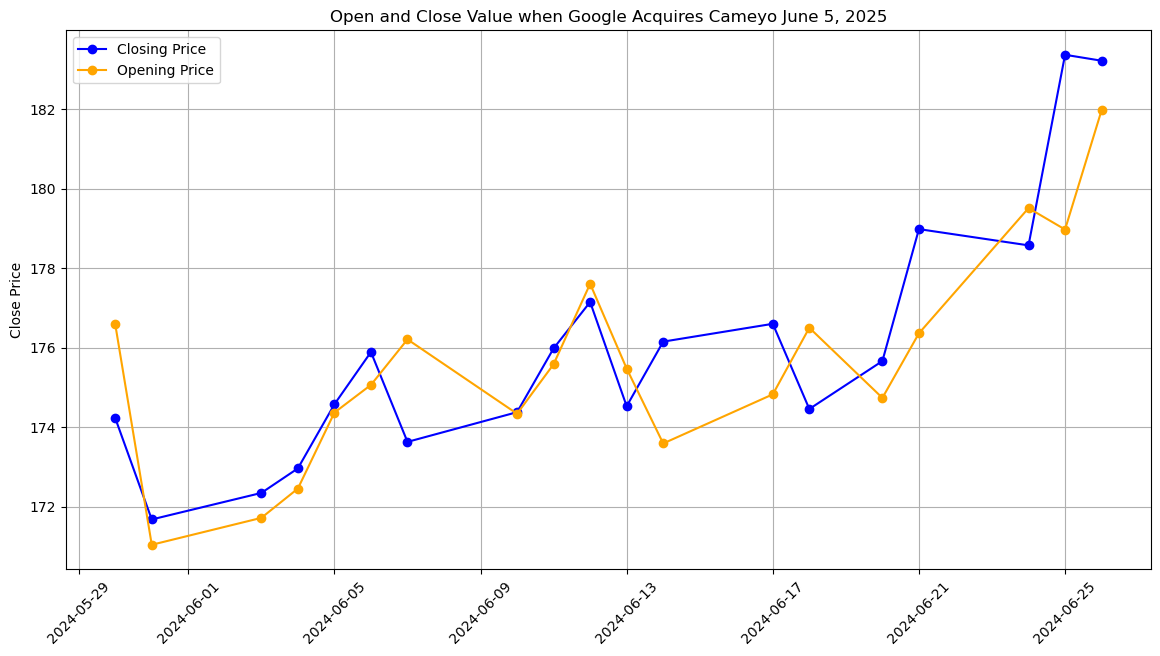

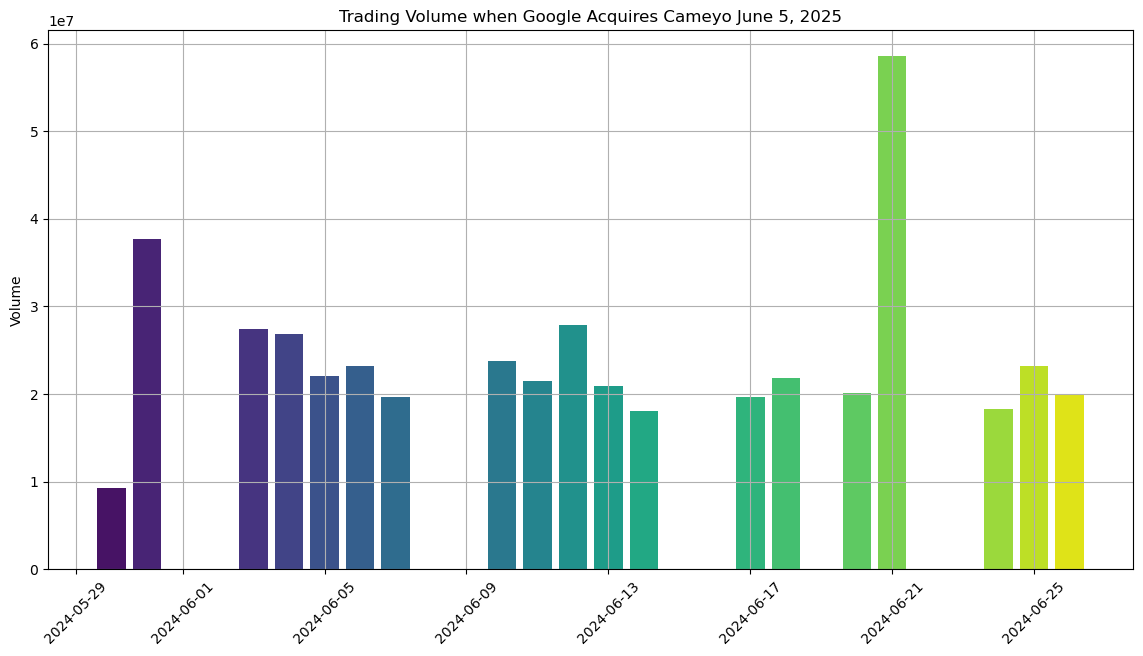

In [20]:
#Google Acquires Cameyo
plt.figure(figsize=(14, 7))
plt.plot(df_cameyo['Date'], df_cameyo['Close'], marker='o', linestyle='-',label= 'Closing Price', color='blue')
plt.plot(df_cameyo['Date'], df_cameyo['Open'], marker='o', linestyle='-', label='Opening Price', color='orange')
plt.title('Open and Close Value when Google Acquires Cameyo June 5, 2025')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

palette = sns.color_palette("viridis", n_colors=len(df_cameyo))
plt.figure(figsize=(14, 7))
plt.bar(df_cameyo['Date'], df_cameyo['Volume'], color=palette)
plt.title('Trading Volume when Google Acquires Cameyo June 5, 2025')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Made by Google Event**  
(August 13, 2024)  

At the Made by Google Event on August 13, 2024, Google unveiled the Pixel 9 series, Pixel Watch 3, Pixel Buds Pro 2, and expanded Gemini AI capabilities. The Pixel 9 series introduced four variants with the new Tensor G4 chip, offering enhanced performance, battery life, and seven years of software updates. Key features include improved computational photography with Gemini Live for real-time editing and integration of Gemini AI for seamless multitasking across apps. The Pixel Watch 3 introduced advanced health tracking and personalized wellness insights with Fitbit and Gemini AI. Meanwhile, the Pixel Buds Pro 2 featured enhanced audio processing with active noise cancellation and Gemini AI integration. This event showcased Google's strategic focus on AI-driven innovations in hardware, positioning it to compete with tech giants like Apple and Samsung.

In [21]:
start_date= '2024-08-07'
end_date= '2024-09-01'

df_made = df_complete[(df_complete['Date'] >= start_date) & (df_complete['Date'] <= end_date)]
df_made.head(10)

,Date,Open,High,Low,Close,Volume
150,2024-08-07,160.666925,162.390665,157.896978,158.365280,25138600
151,2024-08-08,159.929584,163.098093,159.630681,161.444092,25578800
152,2024-08-09,159.431402,163.197732,158.484840,163.078171,28602300
153,2024-08-12,163.755719,164.303718,161.254786,161.703156,15895300
154,2024-08-13,162.819118,164.134337,162.380707,163.566406,18551700
155,2024-08-14,161.812743,162.629785,157.139715,159.790085,40591100
156,2024-08-15,159.919641,161.055518,159.032860,160.716751,31524300
157,2024-08-16,160.886125,164.463140,160.547358,162.370743,24208600
158,2024-08-19,164.682349,166.087254,163.666033,166.067322,22416200
159,2024-08-20,166.296499,168.030213,166.216802,166.575485,18341500


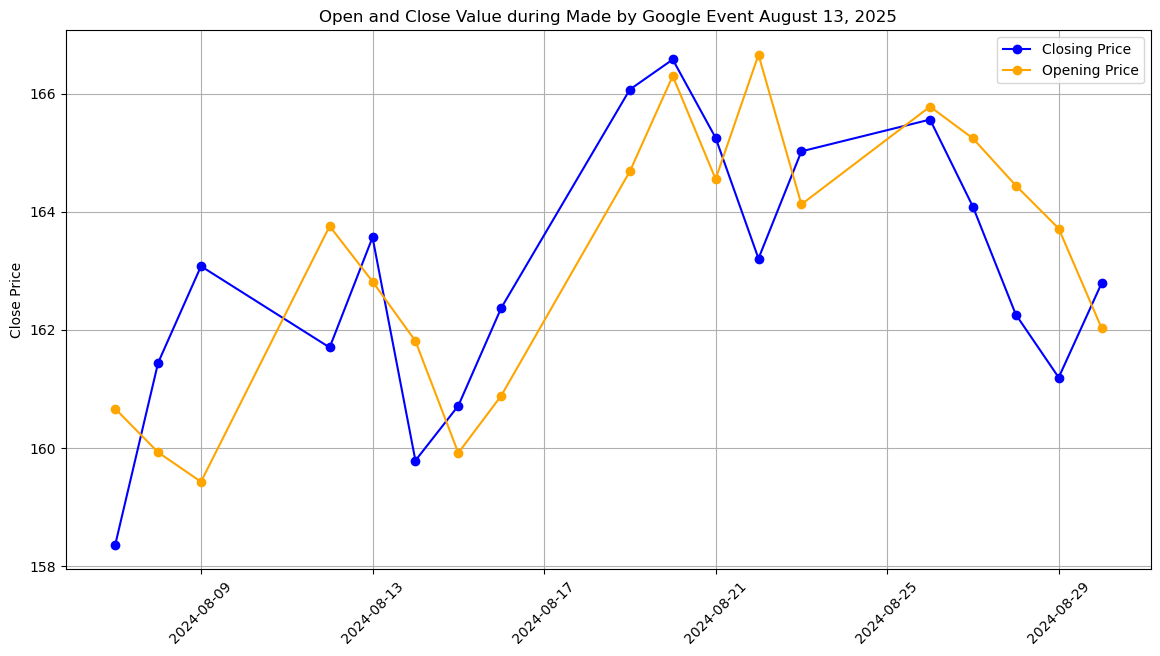

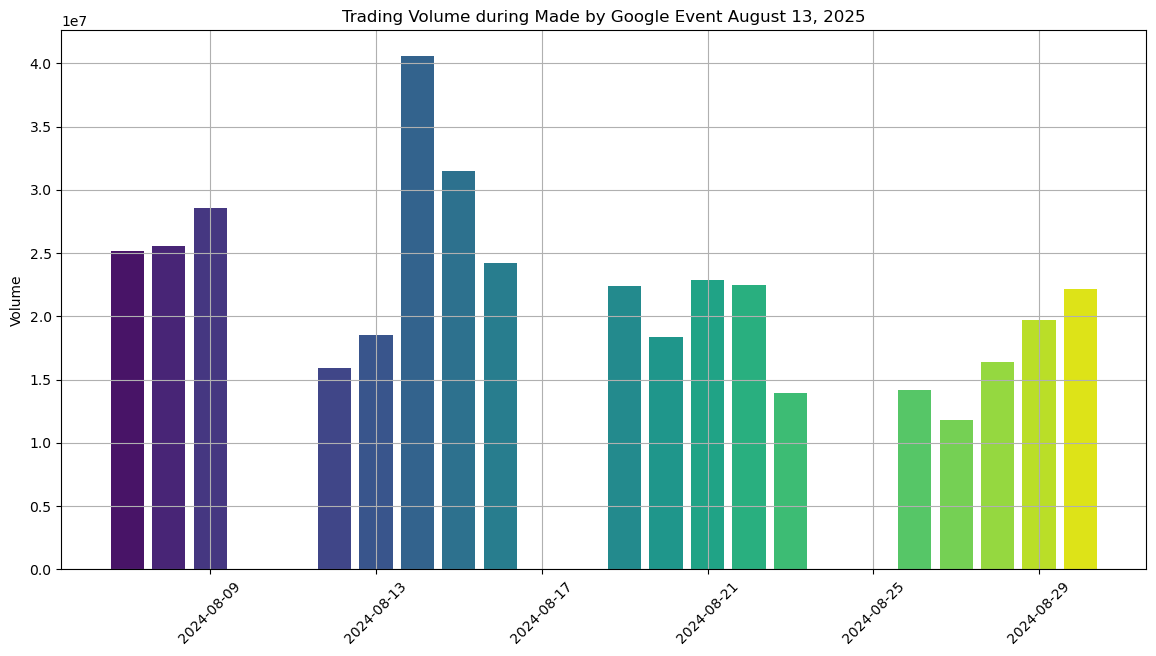

In [22]:
#Made by Google Event
plt.figure(figsize=(14, 7))
plt.plot(df_made['Date'], df_made['Close'], marker='o', linestyle='-',label= 'Closing Price', color='blue')
plt.plot(df_made['Date'], df_made['Open'], marker='o', linestyle='-', label='Opening Price', color='orange')
plt.title('Open and Close Value during Made by Google Event August 13, 2025')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

palette = sns.color_palette("viridis", n_colors=len(df_made))
plt.figure(figsize=(14, 7))
plt.bar(df_made['Date'], df_made['Volume'], color=palette)
plt.title('Trading Volume during Made by Google Event August 13, 2025')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Release of Google TV Streamer**  
(September 24, 2024)  

Released on September 24, 2024, the Google TV Streamer is an upgraded streaming device designed to replace the Chromecast with Google TV. Priced at $99.99, it features a 22% faster processor, 4GB of RAM, and 32GB of storage, allowing for smoother performance and faster app loading. The device supports 4K HDR at 60fps, Dolby Vision, and Dolby Atmos, ensuring high-quality video and audio. It also functions as a Thread smart home hub, integrating with Google Assistant and other smart home devices. While it lacks Wi-Fi 6, it provides significant improvements in functionality and storage, making it a versatile option for users seeking both entertainment and smart home integration. Early reviews praised its performance but noted the absence of Wi-Fi 6 as a drawback.

In [23]:
start_date= '2024-09-18'
end_date= '2024-10-11'

df_tv = df_complete[(df_complete['Date'] >= start_date) & (df_complete['Date'] <= end_date)]
df_tv.head(10)

,Date,Open,High,Low,Close,Volume
179,2024-09-18,159.493324,160.131855,158.236220,159.443436,23677300
180,2024-09-19,163.334488,163.414291,160.969914,161.768082,26587700
181,2024-09-20,163.124962,163.354430,161.688263,163.214752,40896400
182,2024-09-23,163.973010,165.110394,161.299149,161.478745,24150900
183,2024-09-24,162.656033,162.845599,160.321404,161.917725,23332100
184,2024-09-25,161.099609,162.436532,160.930001,161.119568,18869200
185,2024-09-26,163.264636,163.703629,161.907755,162.356720,20319300
186,2024-09-27,162.436544,165.319915,162.256965,163.573929,21101300
187,2024-09-30,162.945379,165.768874,162.885503,165.469574,20413900
188,2024-10-01,167.305355,168.771985,164.202489,166.606964,28338100


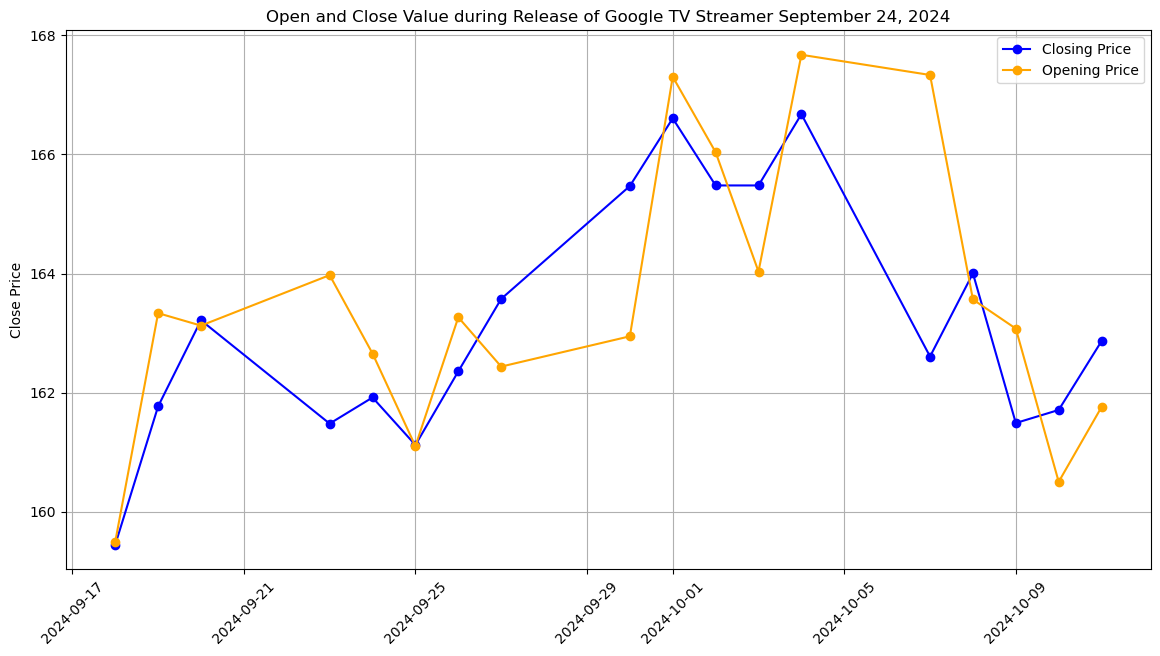

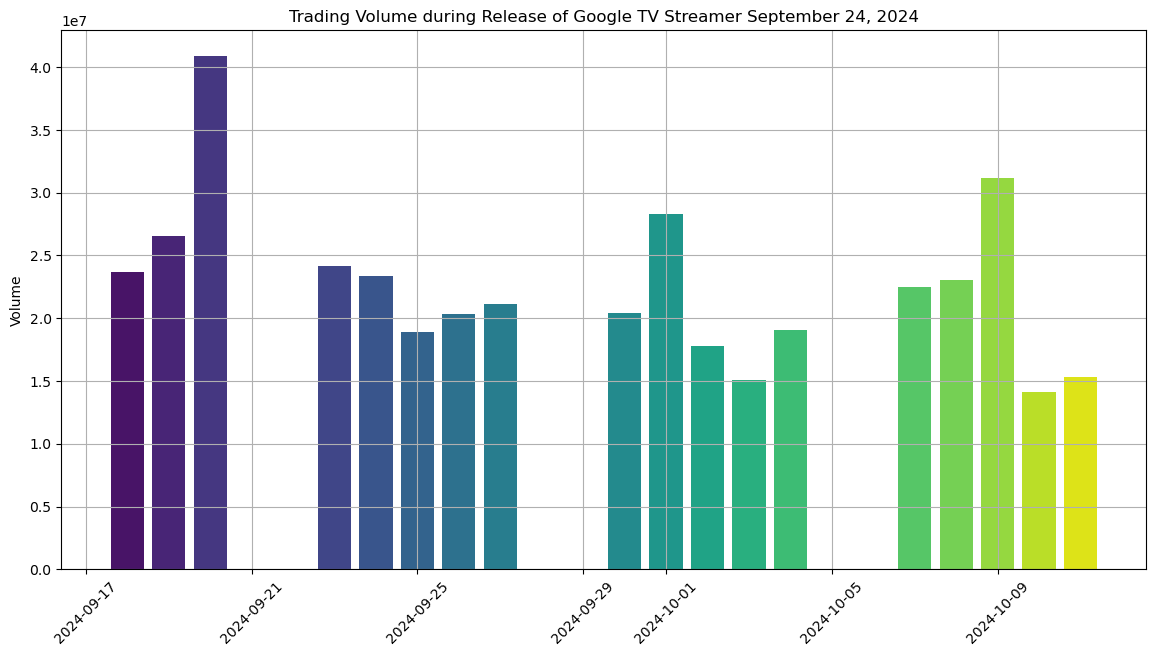

In [24]:
#Release of Google TV Streamer
plt.figure(figsize=(14, 7))
plt.plot(df_tv['Date'], df_tv['Close'], marker='o', linestyle='-',label= 'Closing Price', color='blue')
plt.plot(df_tv['Date'], df_tv['Open'], marker='o', linestyle='-', label='Opening Price', color='orange')
plt.title('Open and Close Value during Release of Google TV Streamer September 24, 2024')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

palette = sns.color_palette("viridis", n_colors=len(df_tv))
plt.figure(figsize=(14, 7))
plt.bar(df_tv['Date'], df_tv['Volume'], color=palette)
plt.title('Trading Volume during Release of Google TV Streamer September 24, 2024')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Launch of Android 15 and Gemini Nano**  
(October 15, 2024)  

On October 15, 2024, Google launched Android 15 alongside Gemini Nano, marking major advancements in both Android's ecosystem and on-device AI. Android 15 introduces features like partial screen sharing, app pairs for split-screen multitasking, and a persistent taskbar for large-screen and foldable devices. It also enhances privacy with Private Space for secure app access, Theft-Deterrent Features, and a Privacy Sandbox to limit data sharing. Gemini Nano, an on-device AI model, offers multimodal capabilities and privacy-focused functionalities, processing data locally for faster, more secure AI interactions. These updates demonstrate Google's commitment to improving productivity, device performance, and user privacy, with Android 15 available on Pixel devices and Gemini Nano expanding to more devices by October 2024.

In [25]:
start_date= '2024-10-08'
end_date= '2024-11-01'

df_droid = df_complete[(df_complete['Date'] >= start_date) & (df_complete['Date'] <= end_date)]
df_droid.head(10)

,Date,Open,High,Low,Close,Volume
193,2024-10-08,163.563952,164.352133,162.496399,164.002945,23072700
194,2024-10-09,163.075073,164.461884,159.373592,161.488724,31181800
195,2024-10-10,160.500990,162.695956,160.032067,161.708221,14144100
196,2024-10-11,161.758100,163.524029,160.870143,162.865555,15344300
197,2024-10-14,163.264640,165.848695,163.025185,164.581619,19016100
198,2024-10-15,165.409705,167.295369,164.252377,165.080475,20247200
199,2024-10-16,164.152599,165.419690,163.364417,164.781158,16406000
200,2024-10-17,165.349839,165.988371,162.386651,162.556259,21453400
201,2024-10-18,162.815683,164.332200,162.705934,163.045151,19757700
202,2024-10-21,162.576223,164.122671,162.246978,163.693665,20946500


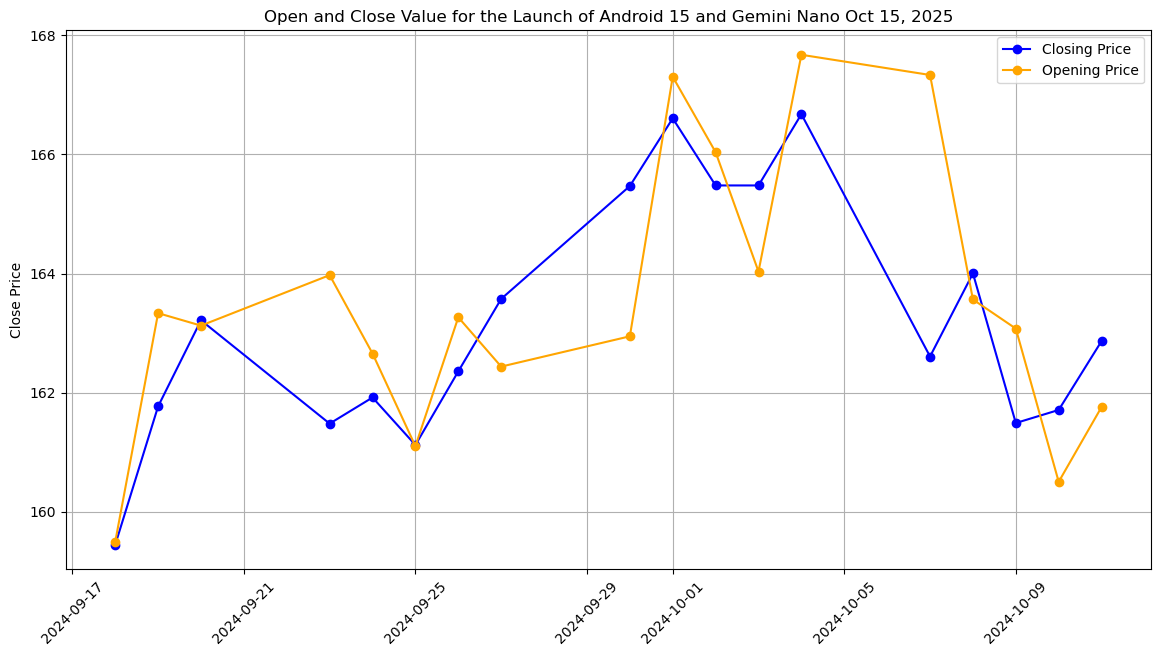

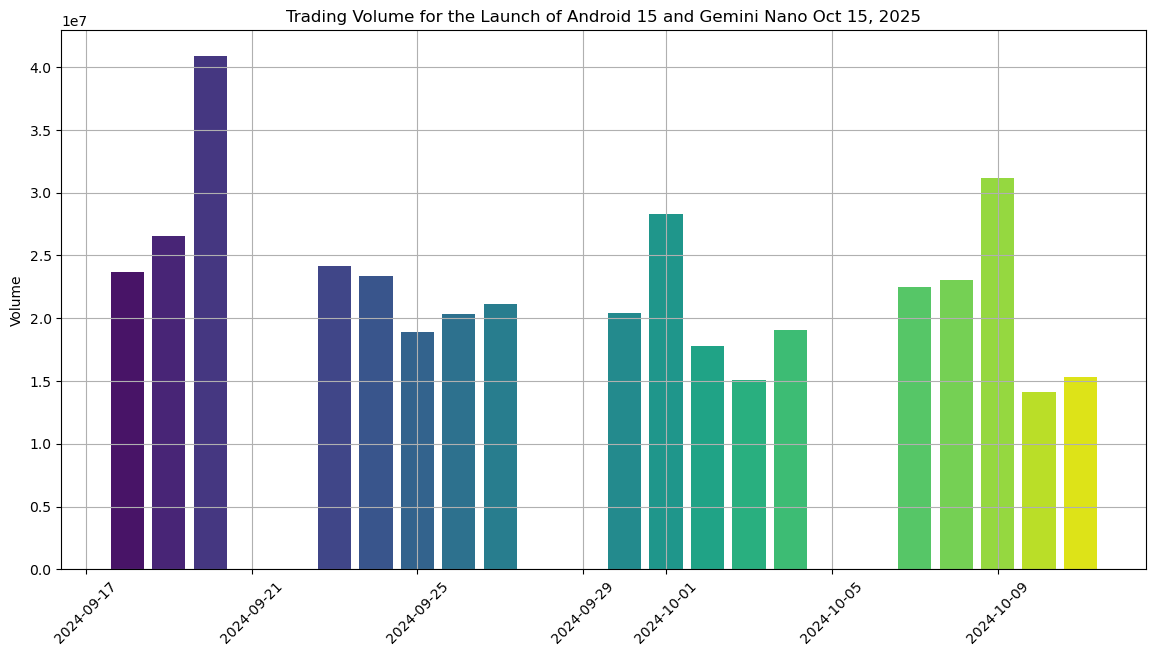

In [26]:
#Launch of Android 15 and Gemini Nano
plt.figure(figsize=(14, 7))
plt.plot(df_tv['Date'], df_tv['Close'], marker='o', linestyle='-',label= 'Closing Price', color='blue')
plt.plot(df_tv['Date'], df_tv['Open'], marker='o', linestyle='-', label='Opening Price', color='orange')
plt.title('Open and Close Value for the Launch of Android 15 and Gemini Nano Oct 15, 2025')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

palette = sns.color_palette("viridis", n_colors=len(df_tv))
plt.figure(figsize=(14, 7))
plt.bar(df_tv['Date'], df_tv['Volume'], color=palette)
plt.title('Trading Volume for the Launch of Android 15 and Gemini Nano Oct 15, 2025')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Android XR Announcement**  
(December 12, 2024)  

On December 12, 2024, Google announced Android XR, a new operating system designed for extended reality (XR) devices like AR glasses, smart glasses, and mixed-reality headsets. Developed in collaboration with Samsung and Qualcomm, Android XR integrates Gemini AI for natural, multimodal interactions, including real-time translations, voice commands, and scene recognition. The platform supports a variety of devices, starting with Samsung's Project Moohan headset, and includes immersive experiences like 3D viewing of YouTube and Google Maps' Immersive View. Android XR also features gesture navigation and AI-driven multitasking, optimized for Qualcomm's Snapdragon XR2 Gen 2 chipset. This launch marks Google's renewed XR ambitions, offering an open ecosystem for developers and a fresh approach after earlier challenges with Google Glass and Daydream VR. The platform is set to launch in 2025, positioning Google as a key player in the evolving AR/VR market.

In [27]:
start_date= '2024-12-06'
end_date= '2024-12-31'

df_xr = df_complete[(df_complete['Date'] >= start_date) & (df_complete['Date'] <= end_date)]
df_xr.head(10)

,Date,Open,High,Low,Close,Volume
235,2024-12-06,171.635404,174.678412,171.465796,174.309265,21462400
236,2024-12-09,173.759892,176.057234,173.450236,175.168259,25389600
237,2024-12-10,182.639662,186.145619,180.841730,184.956985,54813000
238,2024-12-11,185.096827,195.384982,184.637365,195.175217,67894100
239,2024-12-12,194.775678,194.955463,191.489469,191.739182,34817500
240,2024-12-13,190.790257,192.508280,189.421838,189.601639,25143500
241,2024-12-16,192.648128,198.771081,192.398416,196.433777,44934900
242,2024-12-17,197.023087,201.188288,194.755694,195.195190,43504000
243,2024-12-18,194.995420,196.773371,187.524029,188.183258,34166100
244,2024-12-19,191.409558,192.807941,188.163297,188.293137,32265200


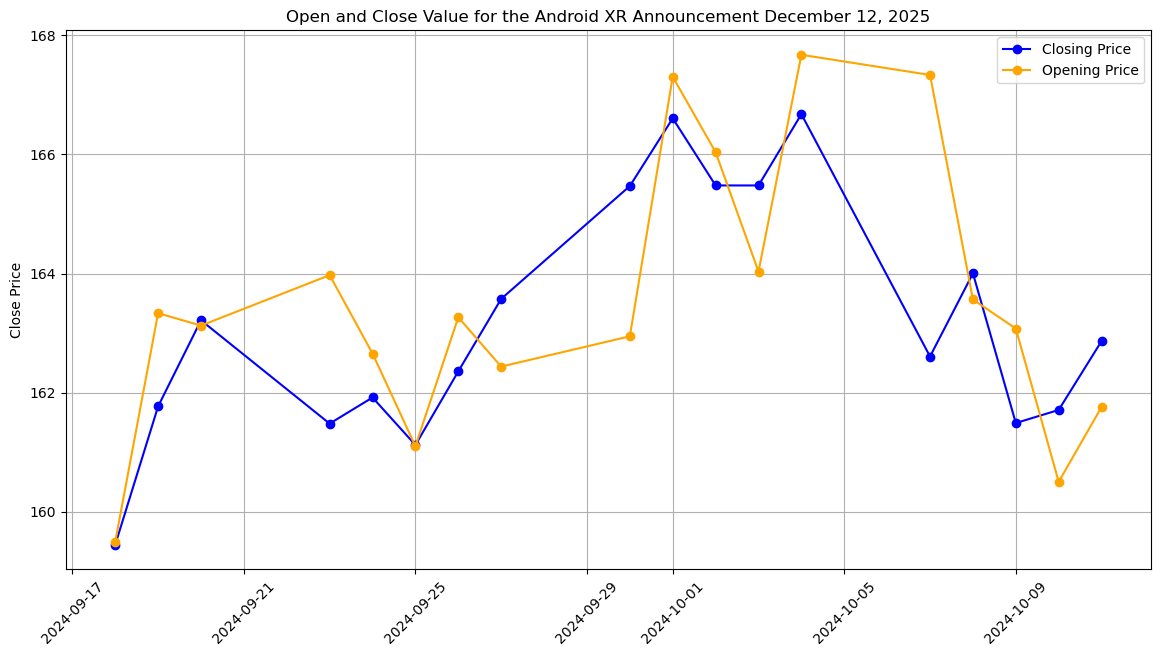

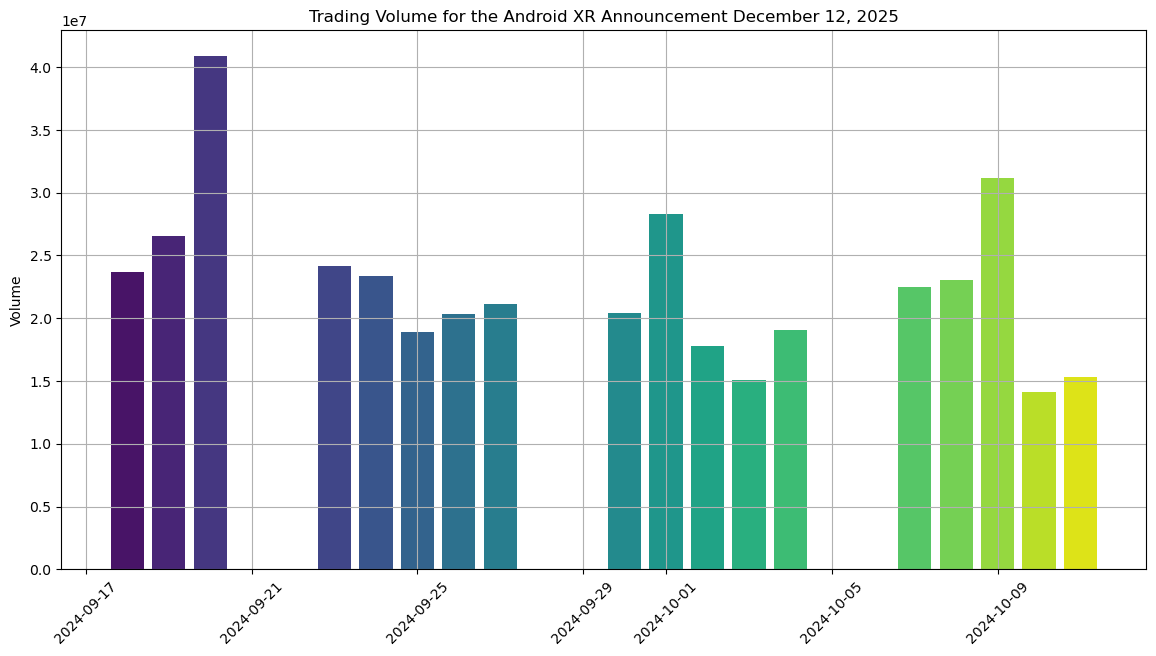

In [28]:
#Android XR Announcement
plt.figure(figsize=(14, 7))
plt.plot(df_tv['Date'], df_tv['Close'], marker='o', linestyle='-',label= 'Closing Price', color='blue')
plt.plot(df_tv['Date'], df_tv['Open'], marker='o', linestyle='-', label='Opening Price', color='orange')
plt.title('Open and Close Value for the Android XR Announcement December 12, 2025')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

palette = sns.color_palette("viridis", n_colors=len(df_tv))
plt.figure(figsize=(14, 7))
plt.bar(df_tv['Date'], df_tv['Volume'], color=palette)
plt.title('Trading Volume for the Android XR Announcement December 12, 2025')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Additional Analysis for Marker Points outside the **<span style="color: blue;">G</span><span style="color: red;">o</span><span style="color: yellow;">o</span><span style="color: blue;">g</span><span style="color: green;">l</span><span style="color: red;">e</span>** Individual Events 

This section provides a comprehensive analysis of trading patterns and key performance indicators for Google stock beyond their individual events for 2024. It includes an examination of significant trading volumes, annual opening and closing prices, year percentage change, and highest/lowest daily gains and losses.

Key dates with notably high or low trading volumes will be identified, as these can indicate shifts in market sentiment or investor interest. The opening and closing prices for the beginning and end of the year will be calculated, along with the percentage change over that period, offering insights into the overall performance of Google stock.

Additionally, the analysis will highlight days with the most significant gains and losses, providing a deeper understanding of volatility in the stock's trading activity. This approach will help contextualize Google’s performance within the broader market landscape and identify factors influencing its trading behavior.

In [29]:
date_first = df_complete.iloc[0]['Date']
open_price = df_complete.iloc[0]['Open']
close_price = df_complete.iloc[0]['Close']

date_first_copy = date_first.strftime('%Y-%m-%d')  

print("First of the Year Record Entry:", date_first_copy)
print("Open Value:", open_price)
print("Close Value:", close_price)

First of the Year Record Entry: 2024-01-02
Open Value: 139.600006
Close Value: 139.559998


In [30]:
date_last = df_complete.iloc[-1]['Date']
open_price = df_complete.iloc[-1]['Open']
close_price = df_complete.iloc[-1]['Close']

date_last_copy = date_last.strftime('%Y-%m-%d')

print("Last Record Entry of the Year:", date_last_copy)
print("Open Value:", open_price)
print("Close Value:", close_price)

Last Record Entry of the Year: 2024-12-30
Open Value: 189.58165840021294
Close Value: 191.02000427246094


In [31]:
open_price = df_complete.iloc[0]['Open']
close_price = df_complete.iloc[-1]['Close']
percentage_change = ((close_price - open_price) / open_price) * 100

print(f"Google percentage gain/loss 2024: {percentage_change:.2f}%")

Google percentage gain/loss 2024: 36.83%


In [32]:
df_complete['Daily_Percentage_Change'] = ((df_complete['Close'] - df_complete['Open']) / df_complete['Open']) * 100
max_gain_row = df_complete.loc[df_complete['Daily_Percentage_Change'].idxmax()]
min_gain_row = df_complete.loc[df_complete['Daily_Percentage_Change'].idxmin()]

print(f"Highest single day % gain: {max_gain_row['Daily_Percentage_Change']:.2f}% on {max_gain_row['Date'].date()}")
print(f"Lowest single day % gain (or highest loss): {min_gain_row['Daily_Percentage_Change']:.2f}% on {min_gain_row['Date'].date()}")

Highest single day % gain: 5.44% on 2024-12-11
Lowest single day % gain (or highest loss): -4.06% on 2024-09-06


In [33]:
#top 10 highest % gain days of trading
df_sorted = df_complete.sort_values(by='Daily_Percentage_Change', ascending=False)
top_10_gains = df_sorted.head(10).copy() 
top_10_gains.loc[:, 'Date'] = top_10_gains['Date'].dt.strftime('%Y-%m-%d')

print("Top 10 Highest Day Percentage Gains:")
print(top_10_gains[['Date', 'Open', 'Close', 'Volume', 'Daily_Percentage_Change']])

Top 10 Highest Day Percentage Gains:
          Date        Open       Close    Volume  Daily_Percentage_Change
238 2024-12-11  185.096827  195.175217  67894100                 5.444928
61  2024-04-01  151.830002  156.500000  24469800                 3.075807
91  2024-05-13  165.847000  170.899994  19648600                 3.046780
245 2024-12-20  185.566276  191.189804  63462900                 3.030469
79  2024-04-25  153.360001  157.949997  36197800                 2.992955
127 2024-07-05  185.187946  189.910812  20967500                 2.550310
223 2024-11-19  173.321525  177.711426  23434900                 2.532808
120 2024-06-25  178.970491  183.364548  23235600                 2.455185
148 2024-08-05  154.937724  158.674164  53630700                 2.411576
152 2024-08-09  159.431402  163.078171  28602300                 2.287359


In [34]:
#bottom 10 
df_sorted_low = df_complete.sort_values(by='Daily_Percentage_Change', ascending=False)
bottom_10_gains = df_sorted_low.tail(10).copy()
bottom_10_gains.loc[:, 'Date'] = bottom_10_gains['Date'].dt.strftime('%Y-%m-%d')

print("Bottom 10 Lowest Day Percentage Gains:")
print(bottom_10_gains[['Date', 'Open', 'Close', 'Volume', 'Daily_Percentage_Change']])

Bottom 10 Lowest Day Percentage Gains:
          Date        Open       Close    Volume  Daily_Percentage_Change
20  2024-01-31  145.389999  141.800003  43908600                -2.469218
172 2024-09-09  152.160152  148.368881  39260500                -2.491632
168 2024-09-03  161.135220  156.790985  38945300                -2.696018
192 2024-10-07  167.335288  162.606155  22463100                -2.826142
141 2024-07-25  171.896167  166.675110  44852000                -3.037332
37  2024-02-26  143.449997  138.750000  33513000                -3.276401
209 2024-10-30  180.265532  174.059814  68890800                -3.442543
243 2024-12-18  194.995420  188.183258  34166100                -3.493498
225 2024-11-21  173.501106  167.245499  59734400                -3.605514
171 2024-09-06  156.731202  150.374268  37912100                -4.055947


In [35]:
# highest day trading volume
max_volume_24 = df_complete.loc[df_complete['Volume'].idxmax()]
max_volume_24_copy = max_volume_24.copy()
max_volume_24_copy['Date'] = max_volume_24['Date'].strftime('%Y-%m-%d')

print("Highest Day Trading Volume:")
print(max_volume_24_copy)


Highest Day Trading Volume:
Date                       2024-10-30
Open                       180.265532
High                        181.60247
Low                        173.660723
Close                      174.059814
Volume                       68890800
Daily_Percentage_Change     -3.442543
Name: 209, dtype: object


In [36]:
#min day trading volume
min_volume_24 = df_complete.loc[df_complete['Volume'].idxmin()]
min_volume_24_copy = min_volume_24.copy()
min_volume_24_copy['Date'] = min_volume_24['Date'].strftime('%Y-%m-%d')

print("Lowest Day Trading Volume:")
print(min_volume_24_copy)

Lowest Day Trading Volume:
Date                       2024-05-30
Open                       176.589996
High                       176.619995
Low                        174.060104
Close                      174.229996
Volume                        9274471
Daily_Percentage_Change     -1.336429
Name: 103, dtype: object


In [37]:
#highest volume trading 
df_complete['Volume'] = pd.to_numeric(df_complete['Volume'], errors='coerce') 
high_volume_dates = df_complete[df_complete['Volume'] > 45_000_000]['Date']

count_highest_volume = high_volume_dates.shape[0]
print(f"Count of rows with Trading Value greater than 65M: {count_highest_volume}")

print("Dates with Trading Volume greater than 45M")
for date in high_volume_dates:
    print(date.strftime('%y-%m-%d'))

Count of rows with Trading Value greater than 65M: 11
Dates with Trading Volume greater than 45M
24-03-18
24-04-26
24-06-21
24-07-24
24-08-05
24-08-06
24-10-30
24-11-21
24-12-10
24-12-11
24-12-20


In [38]:
#lowest volume trading 
df_complete['Date'] = pd.to_datetime(df_complete['Date'], errors='coerce')
df_complete['Volume'] = pd.to_numeric(df_complete['Volume'], errors='coerce') 
low_volume_dates = df_complete[df_complete['Volume'] <= 12_000_000]['Date']

count_lowest_volume = low_volume_dates.shape[0]
print(f"Count of rows with Trading Volume below 12M: {count_lowest_volume}")

print("Dates with Trading Volume less than 12M")
for date in low_volume_dates:
    print(date.strftime('%y-%m-%d'))

Count of rows with Trading Volume below 12M: 6
Dates with Trading Volume less than 12M
24-05-09
24-05-24
24-05-30
24-07-03
24-08-27
24-12-24


## Predictive Modeling: **<span style="color: blue;">G</span><span style="color: red;">o</span><span style="color: yellow;">o</span><span style="color: blue;">g</span><span style="color: green;">l</span><span style="color: red;">e</span>** 2024  

This analysis focuses on the application of predictive modeling techniques to assess Google’s stock performance in 2024, a pivotal year in the company’s growth trajectory. By leveraging historical price data, trading volumes, and market indicators, various models were employed to forecast stock movements and identify trends.

The findings highlight the effectiveness of predictive modeling in providing insights into Google’s stock behavior, helping investors make informed decisions based on quantitative analysis. Overall, the application of these techniques underscores the importance of data-driven approaches in understanding market dynamics and forecasting future performance.

In [39]:
#imports for linear regression application
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

In [40]:
features = ['High', 'Low', 'Open', 'Volume']
target = 'Close'

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(df_complete[features])
y = df_complete[target].values

#train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
#regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression:")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred_lr)}")
print(f"R²: {r2_score(y_test, y_pred_lr)}")

Linear Regression:
RMSE: 0.8980546791729
R²: 0.9964250324598055


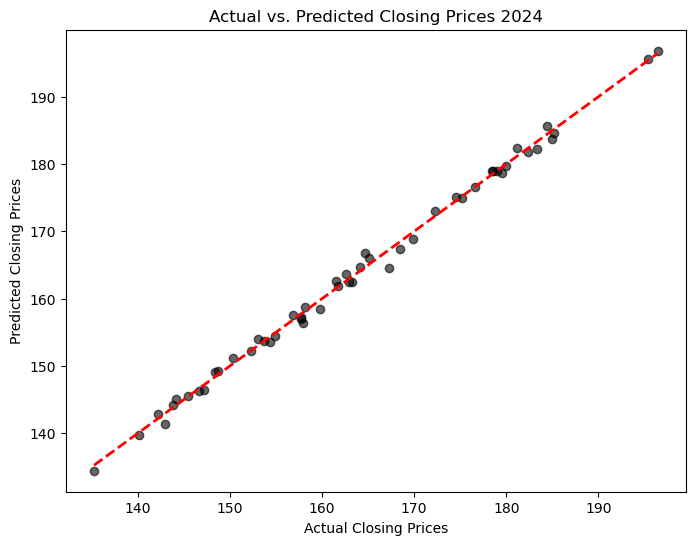

In [42]:
#visual plot representaion
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='black', edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', linewidth=2)  
plt.title('Actual vs. Predicted Closing Prices 2024')
plt.xlabel('Actual Closing Prices')
plt.ylabel('Predicted Closing Prices')
plt.show()

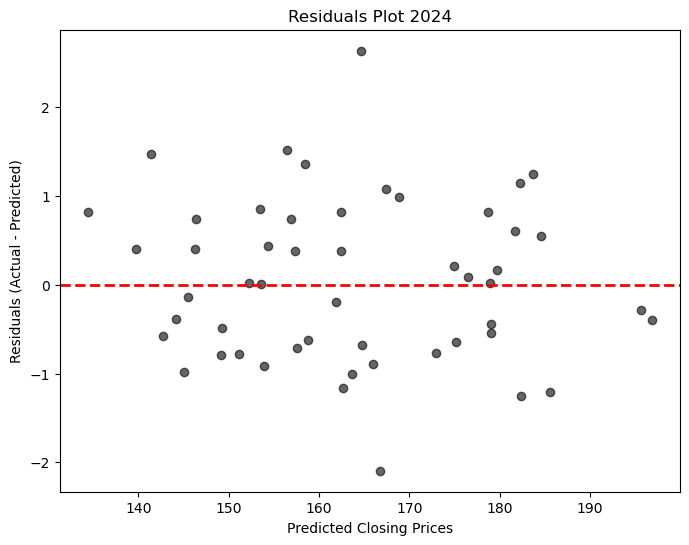

In [43]:
#residuals
residuals = y_test - y_pred_lr

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_lr, residuals, alpha=0.6, color='black', edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals Plot 2024')
plt.xlabel('Predicted Closing Prices')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

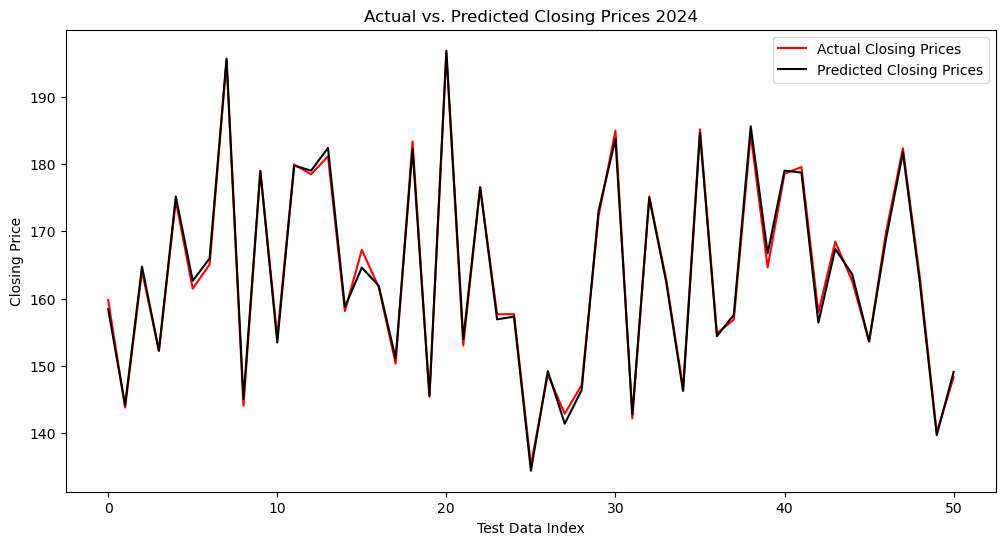

In [44]:
#visual plot representaion
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual Closing Prices', color='red')
plt.plot(np.arange(len(y_test)), y_pred_lr, label='Predicted Closing Prices', color='black')
plt.title('Actual vs. Predicted Closing Prices 2024')
plt.xlabel('Test Data Index')
plt.ylabel('Closing Price')
plt.legend()
plt.show()